#### Clustering Text using KMeans

|Title|Description|
|-|-|
|Reference|[Article](https://medium.com/@evertongomede/clustering-text-in-natural-language-processing-unveiling-patterns-and-insights-8c3cd137b135#:~:text=Text%20Clustering%20Methodologies&text=K%2DMeans%20Clustering%3A%20K%2D,a%20group%20of%20similar%20documents.)|
|Purpose|Learn how to use KMeans algorithm for text clustering|
|Library|skikit-learn|
|Learning type|Unsupervised|
|Learning Algorithm|KMeans|
|Text Vectorizer|TF-IDF ([term frequency-inverse document frequency](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html))|
|Dimensionality reduction algorithm|TruncatedSVD ([Singular Value Decomposition](https://www.youtube.com/watch?v=nbBvuuNVfco))|
|Dataset|skikit-learn.datasets.fetch_20newsgroups|
|Visualization|matplotlib|
|Metric|inertia & number of clusters|

#### Import required libraries

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

#### Dataset

In [ ]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [9]:
print(newsgroups.keys())
print(type(newsgroups.data))
print(len(newsgroups.data))
print(type(newsgroups.data[0]))
print(len(newsgroups.data[0]))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
<class 'list'>
18846
<class 'str'>
712


In [11]:
print(newsgroups.data[0])



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




#### Vectorization

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data)

In [13]:
tfidf_matrix

<18846x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 472469 stored elements in Compressed Sparse Row format>

#### Dimensionality reduction

In [14]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

In [16]:
lsa_matrix

array([[ 0.18228869, -0.04747764],
       [ 0.11049443,  0.14890614],
       [ 0.20115154, -0.10823611],
       ...,
       [ 0.06291686,  0.03415639],
       [ 0.10356304, -0.03295666],
       [ 0.23667685,  0.02209189]])

#### KMeans clustering

In [26]:
k = 20  # Number of clusters (based on the 20 Newsgroups categories)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(lsa_matrix)

KMeans(n_clusters=20, random_state=42)

#### Visualize Cluster

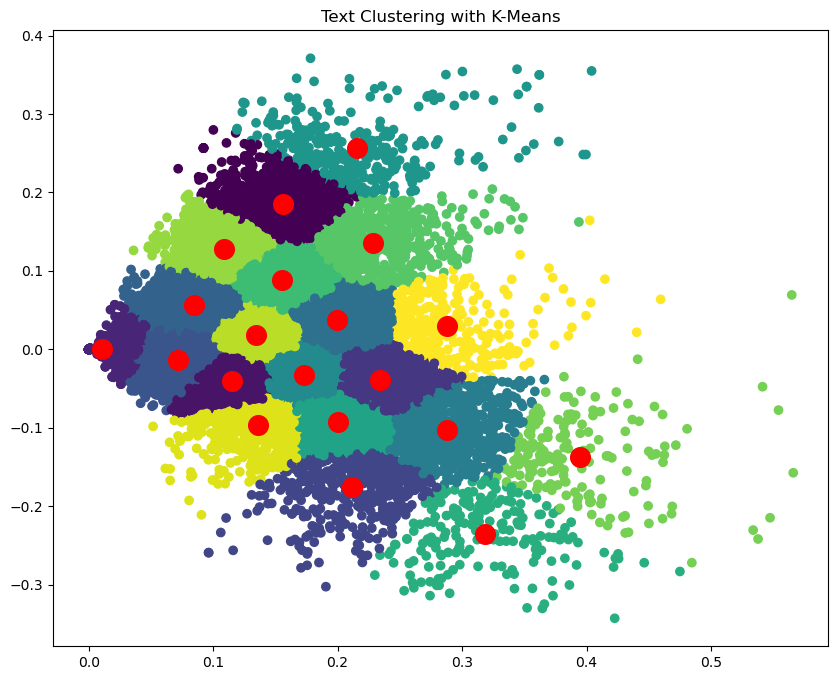

In [27]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='red')
plt.title("Text Clustering with K-Means")
plt.show()